In [3]:
%matplotlib inline
import h5py
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

fig_width_pt = 3*246.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width,fig_height]

params = { 'axes.labelsize': 20,
          'font.family': 'serif',
          'font.serif': 'Computer Modern Raman',
          'font.size': 20,
          'legend.fontsize': 20,
          'xtick.labelsize': 20,
          'ytick.labelsize': 20,
          'axes.grid' : True,
          'text.usetex': True,
          'savefig.dpi' : 100,
          'lines.markersize' : 14,
          'figure.figsize': fig_size}

mpl.rcParams.update(params)

# Read in M_pv posterior

In [5]:
path = '/work/yifan.wang/WWW/parityinj/prod/1plus+voyager'
snrarray = []

for i in np.arange(1,201):
    print(i)
  # read the file
    try:
        h5file = h5py.File(path+'/files_output/posterior_files/H1K1L1V1-EXTRACT_POSTERIOR_INJECTION_'+"{:03d}".format(i)+'-1125100817-63158401.hdf','r')              
        mpv = h5file['samples']['mpvinverse'][()]
        np.savetxt('/work/yifan.wang/WWW/parityinj/prod/DataAnalysis/voyagerMpv_'+"{:03d}".format(i)+'.txt', np.transpose(mpv))
        snrarray.append(np.mean(h5file['samples']['snr'][()]))
    except IOError:
        print(f'The {i:d}th event is not finished yet')
        pass

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200


In [6]:
snrarray

[36.53583280014304,
 49.93726799623846,
 76.9128145023729,
 29.69789388634942,
 11.85665088623799,
 63.636031093226585,
 40.911407582402035,
 96.3287893135967,
 107.93062020858568,
 59.83238361007196,
 25.86185344249107,
 15.704855014109713,
 41.68006507228285,
 42.026785452674964,
 115.51925192693305,
 22.38821215345917,
 101.12805807819166,
 24.24340276722203,
 104.71034930451177,
 13.177327488148107,
 59.92120242675122,
 32.6964364020488,
 73.6951492716023,
 5.508136772168761,
 97.4129567216534,
 61.74945609720284,
 15.118733593397971,
 14.600645523414492,
 25.23878288057171,
 100.61971495571997,
 24.25582738536135,
 64.84948356170179,
 4.4825648792168025,
 29.592129988793214,
 43.1900871015317,
 53.05026667315755,
 51.94932712705384,
 41.91252284011958,
 8.085676851708373,
 68.26113867191468,
 27.67332249875614,
 12.293830875016699,
 34.24372380120764,
 62.534815937677976,
 23.83712679478175,
 29.89694512398292,
 18.335975835757022,
 14.474377560682017,
 5.492246863584501,
 39.8370

# Combine the multiple Mpv posterior

In [7]:
from scipy import stats

In [8]:
#fig = plt.figure();
#ax = fig.add_subplot(111)

#bins = np.logspace(-15,-8,100)
binmin = -5e-8
binmax = 5e-8
binnum = 501
bins = np.linspace(binmin,binmax,binnum)
combine = np.ones(len(bins))
Mpvresult = []

for i in np.arange(1,201):
    print(i)
    # Select the data with SNR > 8
    if snrarray[i-1]<8:
        print(f'The {i:d}th event has SNR lower than 8.')
        continue
    # KDE to get the mpv distribution  
    try:
        Mpv = np.loadtxt('./DataAnalysis/voyagerMpv_'+"{:03d}".format(i)+'.txt')
        kde = stats.gaussian_kde(Mpv)
        #ax.plot(bins, kde(bins), color='black',alpha=0.5)
        for k,n in enumerate(bins):
            combine[k] = combine[k] * (kde(n)/1e6)
    except IOError:
        print(f'The {i:d}th event has IO error.')
        pass
    except ValueError:
        print(f'The {i:d}th event has value error.')
        pass
    
    # normalization to get the combined result
    combine = combine/np.sum(combine)/(bins[2]-bins[1])
    PositiveNormFactor = np.sum(combine[int(len(bins)/2):])*(bins[2]-bins[1])
    CacheCombineMpv = combine/PositiveNormFactor
    
    ind = 1
    findsum = CacheCombineMpv[-ind]
    while findsum*(bins[2]-bins[1]) < 0.1:
        ind = ind+1
        findsum += CacheCombineMpv[-ind]
        
    Mpvresult.append(1./bins[-ind])

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
The 24th event has SNR lower than 8.
25
26
27
28
29
30
31
32
33
The 33th event has SNR lower than 8.
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
The 49th event has SNR lower than 8.
50
51
52
53
54
55
56
57
The 57th event has SNR lower than 8.
58
59
60
61
The 61th event has SNR lower than 8.
62
63
64
65
66
67
68
The 68th event has SNR lower than 8.
69
70
71
72
The 72th event has SNR lower than 8.
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
The 87th event has SNR lower than 8.
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
The 107th event has SNR lower than 8.
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
The 137th event has SNR lower than 8.
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
The 160th event has SNR lower than 8.
161
162
163
164
165
166
The 166th event has SNR lower than

In [ ]:
Mpvresult = np.array(Mpvresult)
fig = plt.figure();
ax = fig.add_subplot(111)

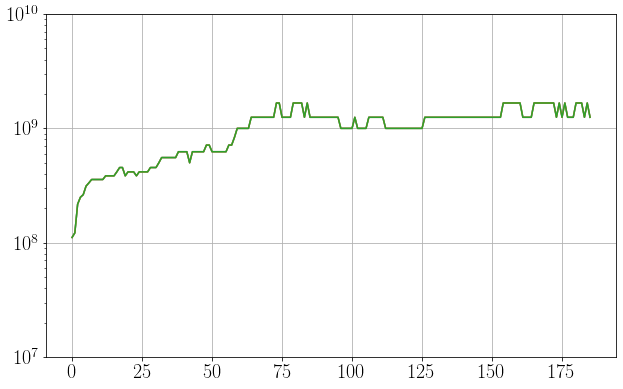

In [12]:
ax.plot(Mpvresult)
ax.set_yscale('log')
ax.set_ylim(1e7,1e10)
fig

In [13]:
np.savetxt('./DataAnalysis/voyagerresults.txt',np.transpose(Mpvresult))

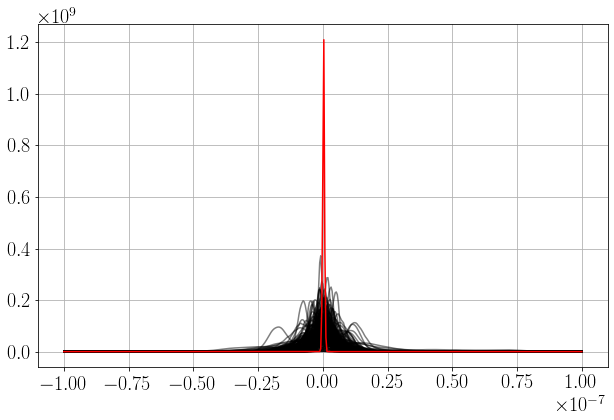

In [28]:
ax.plot(bins, combine, color='red',label='combination')
fig

# Discard the negative part

0.9298425773506278


# Normalization & get the result

249
7.999999999999939e-10
1.250000e+09


# Widening the Gaussian KDE width

In [ ]:
fig = plt.figure();
bx = fig.add_subplot(111)

#bins = np.logspace(-15,-8,100)
binmin = -5e-9
binmax = 5e-9
binnum = 501
bins = np.linspace(binmin,binmax,binnum)
combine = np.ones(len(bins))
#error = 1e-28

for i in np.arange(1,201):
    print(i)
  # read the file
    #if snrarray[i-1]<100:
    #    print(f'The {i:d}th event has SNR lower than 100.')
    #    continue
    try:
        Mpv = np.loadtxt('./Mpvdata/Mpv_'+"{:03d}".format(i)+'.txt')
        if np.quantile(Mpv,0.01) > 0 or np.quantile(Mpv,0.99) < 0 or np.quantile(Mpv,0.5) >4e-9:
            print(f'The {i:d}th event has biased Mpv distribution. The SNR is',snrarray[i-1])
            continue
        kde = stats.gaussian_kde(Mpv)
        kde.set_bandwidth(bw_method='silverman')
        #if np.min(kde(bins)) == 0:
        #    print(f'The {i:d}th event has kde problem.')
  #ax.hist(data,bins=bins, density=True,histtype='step', stacked=True, fill=False,color=event_color[i], label=event)
        bx.plot(bins, kde(bins), color='black',alpha=0.5)
        #findmax = np.max(kde(bins))
        for k,n in enumerate(bins):
            combine[k] = combine[k] * (kde(n)/1e8)
    except IOError:
        print(f'The {i:d}th event has IO error.')
        pass
    except ValueError:
        print(f'The {i:d}th event has value error.')
        pass

1
2
3
The 3th event has biased Mpv distribution. The SNR is 256.34442826770015
4
5
6
7
8
9
10
The 10th event has biased Mpv distribution. The SNR is 177.89062757323393
11
12
13
14
The 14th event has biased Mpv distribution. The SNR is 194.18709934882187
15
16
17
18
19
20
21
22
23
24
25
26
27
28
The 28th event has biased Mpv distribution. The SNR is 52.778277288594715
29
30
The 30th event has biased Mpv distribution. The SNR is 361.5207472688967
31
32
33
34
35
36
37
38
The 38th event has biased Mpv distribution. The SNR is 158.24285115636695
39
40
41
42
43
44
45
The 45th event has biased Mpv distribution. The SNR is 105.10606022993704
46
47
48
49
50


In [178]:
combine

array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0

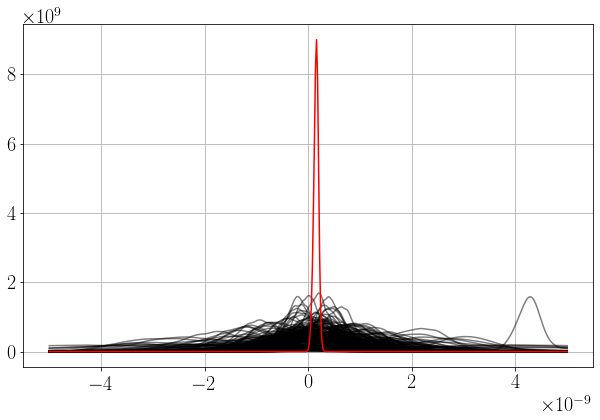

In [179]:
combine = combine/np.sum(combine)/(bins[2]-bins[1])
bx.plot(bins, combine, color='red',label='combination')
fig

In [180]:
PositiveNormFactor = np.sum(combine[int(len(bins)/2):])*(bins[2]-bins[1])
print(PositiveNormFactor)
combine = combine/PositiveNormFactor

0.9995508402472785


In [181]:
i = 1
findsum = combine[-i]
while findsum*(bins[2]-bins[1]) < 0.1:
    i = i+1
    findsum += combine[-i]
print(i)
print(bins[-i])
print("{:e}".format(1./bins[-i]))

241
2.0000000000000014e-10
5.000000e+09
